# Classification of Wood Species based on Images

The Forest Species Database – Microscopic contains 2,240 microscopic images of `112` different wood
species. The images have been captured through microscope optics and the spatial resolution of the
images is 1024 x 768 pixels. The total size of the data set is approx. 3.5 GB.

## 0. Title
Lappeenranta-Lahti University of Technology LUT

BM20A6100 Advanced Data Analysis and Machine Learning - Luento-opetus 6.9.2021-17.12.2021

 
Practical Assignment

Group D: 
Mikhail Farmakovskii, stnum: `000327770`, developer; 
Daniil Kunin, stnum: `000331753`, developer.

19.12.2021


## 1. Problem
Train a convolutional neural network (CNN), classify the images to the predetermined classes (wood species) and quantitatively evaluate the model performance

## 2. Data
https://web.inf.ufpr.br/vri/databases/forest-species-database-microscopic/

## 3. Evaluation
Quantitatively evaluate the model performance

## 4. Features

* There are 112 wood species, 20 images per species = 2,240 images. (112 classes)


## Adjust workspace

In [99]:
# Change this image size if you want, default 220
image_size = 320 # new size of image
NUM_EPOCHS = 20 # № of epochs
BATCH_SIZE = 32 # Define the batch size = 32. The total number of training objects presented in one batch.
num_of_images = 300 # Set the number of images to use for experimenting with model. Maximum - 2240


# Import TensorFlow into jupyter
import tensorflow as tf
# Import Pandas into jupyter
import pandas as pd
# Same for numpy
import numpy as np 

# others
from sklearn.model_selection import train_test_split # for data splitting
import os # access to folder
from os import path
from matplotlib.pyplot import imread # read image
import matplotlib.pyplot as plt
from keras.models import Sequential # Keras

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

## 0. Data processing

In [100]:
# Let's view an image
from IPython.display import Image
# Image("C:/Users/misha/Desktop/sample_project_1/data/001 Ginkgo biloba/00101.png")

### Load images and their labels

In [101]:
def get_filenames(folder):
    """
    The function appends file paths to list
    """
    dirs = os.listdir(folder) # list of folders with species
    filenames = [] # create an empty list
    labels = [] # list for 
    for i in range(0, len(dirs)):
        cur_dir = str(folder + "/" + dirs[i] + "/")
        #print(cur_dir)
        list_of_files = os.listdir(cur_dir) # list of files in current folder
        for j in range(0, len(list_of_files)):
            species = "'" + dirs[i]  + "'" # get true classes
            #print(species)
            QQ = eval(species)
            labels.append(QQ)
        
            files = "'" + cur_dir + str(list_of_files[j]) + "'"
            q = eval(files) 
            filenames.append(q) # append image paths to list 
            
    return filenames, labels

In [102]:
filenames, labels = get_filenames("C:/Users/misha/Desktop/sample_project_1/data")
filenames[:5]

['C:/Users/misha/Desktop/sample_project_1/data/001 Ginkgo biloba/00101.png',
 'C:/Users/misha/Desktop/sample_project_1/data/001 Ginkgo biloba/00102.png',
 'C:/Users/misha/Desktop/sample_project_1/data/001 Ginkgo biloba/00103.png',
 'C:/Users/misha/Desktop/sample_project_1/data/001 Ginkgo biloba/00104.png',
 'C:/Users/misha/Desktop/sample_project_1/data/001 Ginkgo biloba/00105.png']

In [103]:
labels[:5]

['001 Ginkgo biloba',
 '001 Ginkgo biloba',
 '001 Ginkgo biloba',
 '001 Ginkgo biloba',
 '001 Ginkgo biloba']

In [104]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
    print("Number of labels matches the number of filenames")
else:
    print("Number of labels does not matches the number of filenames")

Number of labels matches the number of filenames


In [105]:
labels = np.array(labels) # convert to numpy array
labels[:5]

array(['001 Ginkgo biloba', '001 Ginkgo biloba', '001 Ginkgo biloba',
       '001 Ginkgo biloba', '001 Ginkgo biloba'], dtype='<U31')

### Boolean array

In [106]:
# Find the unique labels values
unique_species = np.unique(labels)
unique_species[:5]

array(['001 Ginkgo biloba', '002 Agathis becarii',
       '003 Araucaria angustifolia', '004 Cephalotaxus drupacea',
       '005 Cephalotaxus harringtonia'], dtype='<U31')

In [107]:
len(unique_species) # 112 - number of classes

112

In [108]:
# Turn every label into an array of boolens
# This code helps us to understand which class corresponds with label (True if yes, else no).
boolean_classes = [label == unique_species for label in labels]
boolean_classes[0]

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

### Data Splitting

In [109]:
# Setup x & y variables
x = filenames
y = boolean_classes

In [110]:
x[:2]

['C:/Users/misha/Desktop/sample_project_1/data/001 Ginkgo biloba/00101.png',
 'C:/Users/misha/Desktop/sample_project_1/data/001 Ginkgo biloba/00102.png']

In [111]:
y[:1]

[array([ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False])]

In [112]:
# Splitting
x_train, x_val, y_train, y_val = train_test_split(x[:num_of_images],
                                                  y[:num_of_images],
                                                  test_size=0.2,
                                                  random_state=42)

len(x_train), len(y_train), len(x_val), len(y_val) 

(240, 240, 60, 60)

In [113]:
x_train[:1], y_train[:1]

(['C:/Users/misha/Desktop/sample_project_1/data/012 Fitzroya cupressoides/01213.png'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False,  True, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False])])

## 1.Preprocessing Images

### In this section we should convert images to tensors
`Tensors` are multi-dimensional arrays. Its type is np.array



In [114]:
# It is possible to convert pixels to array. Its shape is (768, 1024, 3)
image = imread(filenames[0])
image.shape

(768, 1024, 3)

In [115]:
image[:1]

array([[[0.28235295, 0.20784314, 0.15294118],
        [0.28235295, 0.19607843, 0.14509805],
        [0.32156864, 0.19215687, 0.13333334],
        ...,
        [0.1254902 , 0.10980392, 0.11372549],
        [0.09803922, 0.1254902 , 0.09803922],
        [0.10196079, 0.12156863, 0.10588235]]], dtype=float32)

### Function for color scaling and size reshaping 

In [116]:
def process_image(Image_path, img_size=image_size):
    """
    Here we are using a Tensorflow function to process images.
    Input: file path
    Output: Tensor (array)
    """
    
    # Read image by using path
    Image = tf.io.read_file(Image_path)
    # Turn the image into numerical tensor with 3 colour channels
    Image = tf.image.decode_png(Image, channels=3)
    # Convert the colour channel 0-255 to 0-1 
    Image = tf.image.convert_image_dtype(Image, tf.float32)
    # Resize the image
    Image = tf.image.resize(Image, size=[img_size, img_size])                                
    return Image

In [117]:
# Function to get image and its label
def get_image_label(image_path, label):
    """
    Function get_image_label returns the image after processing (Tensor type) & its label
    """
    image = process_image(image_path)
    return image, label

### Creating data samples
Getting many pairs by using function `get_image_label`

In [118]:
# Create a function to return data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    """
    Create batches of data. Pairs are used (tensor and true class)
    Input: x: image path, y: true class, batch size (default 32), also for test and validation data.
    Output: samples of data with tensors and their classes
    
    from_tensor_slices - creates a Dataset whose elements are slices of the given tensors.
    The given tensors are sliced along their first dimension.
    
    .batch - combines consecutive elements of this dataset into batches.
    """


  # If the data is a test dataset (no labels)
    if test_data:
        print("Creating test data batches.......")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # 
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch


  # If data is a valid dataset. Don't need to shuffle
    elif valid_data:
        print("Creating validation data batches.......")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch

    # this is for train data
    else:
        print("Creating training data batches.......")
        # Turn filepaths and labels into tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
        # Shuffling pathnames and labels
        data = data.shuffle(buffer_size=len(x))

        data_batch = data.map(get_image_label).batch(BATCH_SIZE)

        return data_batch


In [119]:
# Create training and validation data batches
train_data = create_data_batches(x_train, y_train)
valid_data = create_data_batches(x_val, y_val, valid_data=True)

Creating training data batches.......
Creating validation data batches.......


### Visualizing Data Batches

In [120]:
train_data

<BatchDataset shapes: ((None, 320, 320, 3), (None, 112)), types: (tf.float32, tf.bool)>

In [121]:
# FUnction for viewing images in a data batch
def show_25_images(images, labels):
    """
    Displays a plot of 25 images and their labels from a data batch
    """
  
  # Setup the figure
    plt.figure(figsize=(18,18))
    # Loop through 25
    for i in range(10):
    # Create sublots (5 row, 5 columns)
        ax = plt.subplot(5 , 5, i+1)
        # Display an image
        plt.imshow(images[i])
        # Add the image label as the title
        plt.title(unique_species[labels[i].argmax()])
        # Grid lines off
        plt.axis("off")

In [122]:
train_images, train_labels = next(train_data.as_numpy_iterator())
len(train_images), len(train_labels)

val_images, tval_labels = next(valid_data.as_numpy_iterator())
len(val_images), len(tval_labels)

(32, 32)

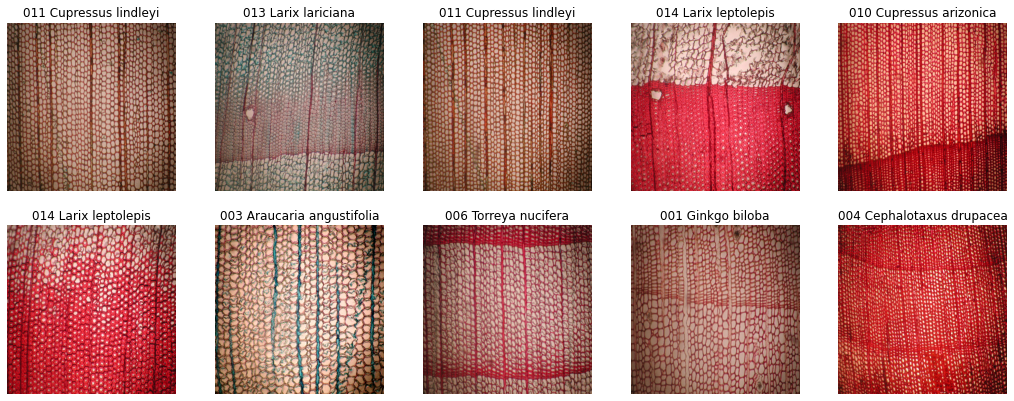

In [123]:
# Visualize the data in a training batch
show_25_images(train_images, train_labels)

## 2. Building a model

In [124]:
# Setup shape to the model
INPUT_SHAPE = [None, image_size, image_size, 3] # batch, heigh....

# Setup output shape of model
OUTPUT_SHAPE = len(unique_species)

In [125]:
(INPUT_SHAPE[1:], OUTPUT_SHAPE)

([320, 320, 3], 112)

### Setup the model

In [126]:
train_data

<BatchDataset shapes: ((None, 320, 320, 3), (None, 112)), types: (tf.float32, tf.bool)>

In [127]:
# Setup the model
model = tf.keras.Sequential()
model.add(Conv2D(150, (2, 2), input_shape=INPUT_SHAPE[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))   

model.add(Conv2D(75, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(30, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(OUTPUT_SHAPE))
model.add(Activation('softmax'))


# Compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
optimizer=tf.keras.optimizers.Adam(),
metrics=["accuracy"])


### Layers of neural network

In [128]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 319, 319, 150)     1950      
_________________________________________________________________
activation_8 (Activation)    (None, 319, 319, 150)     0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 159, 159, 150)     0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 159, 159, 150)     0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 158, 158, 75)      45075     
_________________________________________________________________
activation_9 (Activation)    (None, 158, 158, 75)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 79, 79, 75)       

### Settings for neural network

In [129]:
# Load Tensorboard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [130]:
import datetime

# Function for TensorBoard callback
def create_tensorboard_callback():
    # Create a log directory for storing logs
    logdir = os.path.join("C:/Users/misha/Desktop/sample_project_1/logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(logdir)

In [131]:
# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [132]:
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

GPU available


### Training

In [133]:
# Function to save a model
def save_model(model, suffix=None):
    """
    Saves a model in a directory and appends suffix (string)
    """
    # path
    modeldir = os.path.join("C:/Users/misha/Desktop/sample_project_1/")
  
    model_path = modeldir + suffix + ".h5"
    print(f"Saving model to: {model_path}.......")
    model.save(model_path)
    return model_path

In [134]:
# fucntion to load a model
def load_model(model_path):
    """
    Load a saved model
    """
    print(f"Loading saved model from: {model_path}.......")
    model = tf.keras.models.load_model(model_path)
                                    
    return model

In [135]:
# Function to train
def train_model(model):
    """
    Trains a given model and returns the  trained version
    """

  # Create new tensorBoard session everytime we train a model
    tensorboard = create_tensorboard_callback()

  # Fit the model
    model.fit(x=train_data, # images(tensors) and its labels(bool)
            epochs=NUM_EPOCHS,
            validation_data=valid_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
    save_model(model, suffix="WoodClassification")
    return model

In [136]:
if os.path.exists('C:/Users/misha/Desktop/sample_project_1/WoodClassification.h5'):
    model = load_model('C:/Users/misha/Desktop/sample_project_1/WoodClassification.h5')
else:
    model = train_model(model)

Loading saved model from: C:/Users/misha/Desktop/sample_project_1/WoodClassification.h5.......


## 3. Evaluation

In [137]:
# %tensorboard --logdir C:/Users/misha/Desktop/sample_project_1/logs

In [138]:
predictions = model.predict(valid_data, verbose=1)
model.evaluate(valid_data)

2/2 [==============================] - 0s 79ms/step - loss: 1.0635 - accuracy: 0.6833


[1.0634750127792358, 0.6833333373069763]

In [139]:
# predictions[0]

In [140]:
# unique_species

In [141]:
# # First prediction
# index = 0
# print(predictions[index])
# print(f"Max value (prabability of prediction 1 image): {np.max(predictions[index])}")
# print(f"Sum:{np.sum(predictions[index])}")
# print(f"Max index:{np.argmax(predictions[index])}")
# print(f"Predicted label: {unique_species[np.argmax(predictions[index])]}")

### Probabilities

In [142]:
def get_pred_label(predictions_probabilities):
    """
    Turns an array of prediciton probs into a labels
    """
    return unique_species[np.argmax(predictions_probabilities)]

In [143]:
# Function to unbatch
def unbatchify(data):
    """
    Takes a batched dataset of (image, label) tensors and returns separate arrays
    of images and labels
    """
    images = []
    labels = []
    # loop through unbatched data
    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_species[np.argmax(label)])
    return images, labels

In [144]:
val_images, val_labels = unbatchify(valid_data)
# val_images[1], val_labels[1]

In [145]:
images_ = []
labels_ = []

# loop through unbatched data
for image, label in valid_data.unbatch().as_numpy_iterator():
    images_.append(image)
    labels_.append(label)

In [146]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
    """
    Plus the top 10 highest predictions confidences along with the truth label for n sample.
    """

    pred_prob, true_label = prediction_probabilities[n], labels[n]

    # Get the predicted label
    pred_label = get_pred_label(pred_prob)

    # Find the top 10 prediction indexes
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]


    # Find the top 10 prediction cofidence values
    top_10_pred_values = pred_prob[top_10_pred_indexes]

    # Find the top 10 prediction labels
    top_10_pred_labels = unique_species[top_10_pred_indexes]

    # Plotting
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
    plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  # Change the color of true labels
    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
    else:
        pass

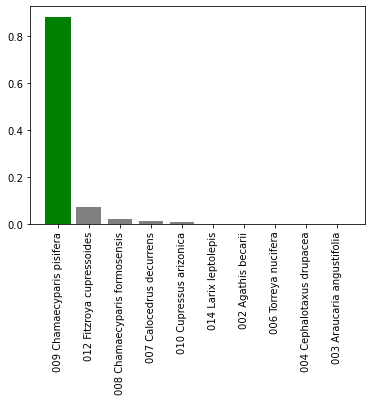

In [147]:
plot_pred_conf(prediction_probabilities=predictions,
               labels = val_labels,
               n=9)